### Problem Statement:
The objective of the data science dataset is to predict Salary. The datasets of several predictor (independent) variables and one target variable (salary)

### Dataset Information:
1) job_title : job_title of Primary Beneficiary       
2) experience_level : employee experience level (EN, SE, MI, EX)   
                      :- (SE) Senior-level employees    
                      :- (MI) Mid-level employees    
                      :- (EX) Executive-level employees  
                      :- (EN) Entry-level employees.    
3) employee_type    : employee work type (FT, PT, CT, FL)      
4) company_location : location of the company (AS, CF, CL, DZ, GR, JP, PK, US, VN)     
                      :- AS: American Samoa                   
                      :- CF: Central African Republic        
                      :- CL: Chile                
                      :- DZ: Algeria                   
                      :- GR: Greece                  
                      :- JP: Japan               
                      :- PK: Pakistan              
                      :- US: United States              
                      :- VN: Vietnam          

5) salary    : salary should based on independant variables


### Step 1: Importing Libraries like Numpy, Pandas, Matplotlib, Seaborn and Scikit learn(Sklearn)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
from warnings import filterwarnings
filterwarnings('ignore')

### Step 2: Load the Dataset

In [2]:
data=pd.read_csv(r"C:\Users\haric\OneDrive\Documents\ML\Linear Regression\Simple Linear Regression\Projects\ds_salaries.csv")
data=pd.DataFrame(data)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

# Here some columns are not important to find a Linear Regression
    - salary
    - salary_currency
    - employee_residence 
    - remote_ratio

In [4]:
data.drop(columns=['salary_currency','salary','employee_residence','remote_ratio'],
          axis=1,inplace=True)

In [5]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,L
1,2023,MI,CT,ML Engineer,30000,US,S
2,2023,MI,CT,ML Engineer,25500,US,S
3,2023,SE,FT,Data Scientist,175000,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,M


In [7]:
data.dtypes

work_year            int64
experience_level    object
employment_type     object
job_title           object
salary_in_usd        int64
company_location    object
company_size        object
dtype: object

<AxesSubplot:xlabel='salary_in_usd'>

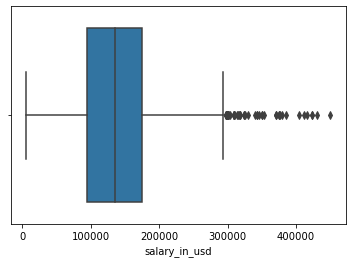

In [9]:
sns.boxplot(data.salary_in_usd)

In [10]:
data[data['salary_in_usd']>350000].index

Int64Index([ 478,  528,  649, 1105, 1258, 1288, 1311, 2011, 2359, 3463, 3468,
            3522, 3675, 3747, 3750],
           dtype='int64')

In [11]:
data.drop([ 478,  528,  649, 1105, 1258, 1288, 1311, 2011, 2359, 3463, 3468,
            3522, 3675, 3747, 3750],axis=0,inplace=True)

<AxesSubplot:xlabel='salary_in_usd'>

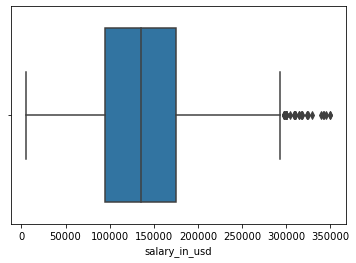

In [12]:
sns.boxplot(data.salary_in_usd)

In [13]:
data.reset_index(inplace=True)

In [14]:
data.shape

(3740, 8)

### Step 3: Exploratory Data Analysis

Exploratory Data Analysis (EDA), also known as Data Exploration, it is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In this step, we will perform the below operations:

### 3.1) understanding Your Variables
        3.1.1) Head of the dataset
        3.1.2) The shape of the dataset
        3.1.3) List types of all columns
        3.1.4) Info of the dataset
        3.1.5) Summary of the dataset
        
### 3.2) Data Cleaning
        3.2.1) Checking the Duplicates
        3.2.2) Check the Null values

### 3.1.1) Head of the Dataset

The head() function will tell you the top records in the dataset. By default, python shows you only the top 5 records.

This head(n) function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default it will show 5 rows.

In [15]:
data.head()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,0,2023,SE,FT,Principal Data Scientist,85847,ES,L
1,1,2023,MI,CT,ML Engineer,30000,US,S
2,2,2023,MI,CT,ML Engineer,25500,US,S
3,3,2023,SE,FT,Data Scientist,175000,CA,M
4,4,2023,SE,FT,Data Scientist,120000,CA,M


In [16]:
data.tail()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
3735,3749,2021,SE,FT,Data Specialist,165000,US,L
3736,3751,2021,MI,FT,Principal Data Scientist,151000,US,L
3737,3752,2020,EN,FT,Data Scientist,105000,US,S
3738,3753,2020,EN,CT,Business Data Analyst,100000,US,L
3739,3754,2021,SE,FT,Data Science Manager,94665,IN,L


In [17]:
data.drop(columns='index',axis=1,inplace=True)

### 3.1.2) The Shape of the dataset
This shape() function gives us the **number of rows** and **columns** of the dataset.

In [18]:
data.shape

(3740, 7)

No of Rows = 3740    
No of Columns = 7

### 3.1.3) List types of all columns 
Using df.dtypes, we get the list of types of all the columns in our dataset.

In [19]:
data.dtypes

work_year            int64
experience_level    object
employment_type     object
job_title           object
salary_in_usd        int64
company_location    object
company_size        object
dtype: object

# 3.1.4) Info of the dataset
info() is used to check the information about the data and the datatypes of each respective attribute and also gives you the count.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3740 non-null   int64 
 1   experience_level  3740 non-null   object
 2   employment_type   3740 non-null   object
 3   job_title         3740 non-null   object
 4   salary_in_usd     3740 non-null   int64 
 5   company_location  3740 non-null   object
 6   company_size      3740 non-null   object
dtypes: int64(2), object(5)
memory usage: 204.7+ KB


### 3.1.5) Summary of the dataset

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

In [21]:
data.describe()   # we cn get Statistical Summary

,work_year,salary_in_usd
count,3740.000000,3740.000000
mean,2022.375134,136532.548930
std,0.689331,60985.678735
min,2020.000000,5132.000000
25%,2022.000000,95000.000000
50%,2022.000000,135000.000000
75%,2023.000000,175000.000000
max,2023.000000,350000.000000


### Distribution Numerical Features

In [22]:
numerical = data.dtypes[data.dtypes!='object'].index
numerical

Index(['work_year', 'salary_in_usd'], dtype='object')

In [23]:
len(numerical)

2

In [24]:
data.describe()

,work_year,salary_in_usd
count,3740.000000,3740.000000
mean,2022.375134,136532.548930
std,0.689331,60985.678735
min,2020.000000,5132.000000
25%,2022.000000,95000.000000
50%,2022.000000,135000.000000
75%,2023.000000,175000.000000
max,2023.000000,350000.000000


### Distribution of Categorical Features

In [25]:
categorical = data.dtypes[data.dtypes=='object'].index
categorical

Index(['experience_level', 'employment_type', 'job_title', 'company_location',
       'company_size'],
      dtype='object')

In [26]:
len(categorical)

5

In [27]:
data[categorical].describe()

,experience_level,employment_type,job_title,company_location,company_size
count,3740,3740,3740,3740,3740
unique,4,4,92,72,3
top,SE,FT,Data Engineer,US,M
freq,2506,3704,1040,3027,3145


### Check the Unique Lables in the categorical variables

In [28]:
data.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [29]:
data.experience_level.value_counts()

SE    2506
MI     802
EN     320
EX     112
Name: experience_level, dtype: int64

In [30]:
data.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [31]:
data.employment_type.value_counts()

FT    3704
PT      17
FL      10
CT       9
Name: employment_type, dtype: int64

In [32]:
data.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Scientist', 'Lead 

In [33]:
data.job_title.nunique()

92

In [34]:
data.job_title.value_counts()

Data Engineer                               1040
Data Scientist                               838
Data Analyst                                 610
Machine Learning Engineer                    289
Analytics Engineer                           103
Data Architect                               100
Research Scientist                            80
Data Science Manager                          58
Applied Scientist                             58
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      18
BI Data Analyst                               15
Business Data Analyst                         15
AI Scientist                                  15
Data Specialist                               14
BI Developer        

In [35]:
count=data['job_title'].value_counts()

In [37]:
job_title_lessthan20=count[count<=20]
job_title_lessthan20

Computer Vision Engineer                    18
BI Data Analyst                             15
Business Data Analyst                       15
AI Scientist                                15
Data Specialist                             14
BI Developer                                13
AI Developer                                11
Big Data Engineer                           11
Machine Learning Infrastructure Engineer    11
Applied Machine Learning Scientist          11
Data Operations Engineer                    10
Head of Data                                10
ETL Developer                               10
Director of Data Science                    10
Machine Learning Software Engineer           9
BI Analyst                                   9
Lead Data Scientist                          9
Head of Data Science                         9
Applied Data Scientist                       9
Data Science Lead                            8
Principal Data Scientist                     7
NLP Engineer 

## Making job_titles less than 10 in frequency as others

In [38]:
def handle_job_title(value):
    if(value in job_title_lessthan20):
        return 'others'
    else:
        return value

data['job_title']=data['job_title'].apply(handle_job_title)
data['job_title'].value_counts()

Data Engineer                 1040
Data Scientist                 838
Data Analyst                   610
others                         392
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 100
Research Scientist              80
Applied Scientist               58
Data Science Manager            58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: job_title, dtype: int64

many of there working as Data Engineer 

In [39]:
data.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI', 'MX',
       'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE', 'GR',
       'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT', 'AS',
       'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK', 'BO',
       'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ', 'IQ',
       'CN', 'NZ', 'CL', 'MD', 'IL', 'MT'], dtype=object)

In [40]:
data.company_location.value_counts()

US    3027
GB     171
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
PT      14
GR      14
AU      14
NL      13
MX      10
IE       7
AT       6
SG       6
JP       6
TR       5
CH       5
NG       5
PL       5
CO       4
SI       4
IT       4
PR       4
PK       4
UA       4
BE       4
LV       4
DK       4
CZ       3
HR       3
TH       3
LU       3
FI       3
AS       3
AE       3
RU       3
AR       3
HU       2
CF       2
EE       2
SE       2
KE       2
RO       2
ID       2
GH       2
LT       2
CR       1
MK       1
AL       1
MY       1
IQ       1
CL       1
PH       1
MA       1
HK       1
NZ       1
HN       1
CN       1
MD       1
DZ       1
SK       1
EG       1
IR       1
AM       1
VN       1
MT       1
BO       1
BA       1
BS       1
IL       1
Name: company_location, dtype: int64

In [41]:
clo=data['company_location'].value_counts()

In [42]:
cl_equal_1=clo[clo<5]

## Making company_location are < 5 in frequency as others

In [43]:
def handle_company_location(value):
    if(value in cl_equal_1):
        return 'others'
    else:
        return value

data['company_location']=data['company_location'].apply(handle_company_location)
data['company_location'].value_counts()

US        3027
GB         171
others     105
CA          87
ES          77
IN          58
DE          56
FR          34
BR          15
PT          14
AU          14
GR          14
NL          13
MX          10
IE           7
SG           6
JP           6
AT           6
TR           5
CH           5
PL           5
NG           5
Name: company_location, dtype: int64

In [44]:
data.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

In [45]:
data.company_size.value_counts()

M    3145
L     448
S     147
Name: company_size, dtype: int64

In [46]:
for i in data.columns:
    print("\nColumn_Name =",i,"\n")
    print("Unique_Values =",data[i].unique())
    print("\n",i,"--> Column Unique_value Count =",data[i].nunique(),"\n")


Column_Name = work_year 

Unique_Values = [2023 2022 2020 2021]

 work_year --> Column Unique_value Count = 4 


Column_Name = experience_level 

Unique_Values = ['SE' 'MI' 'EN' 'EX']

 experience_level --> Column Unique_value Count = 4 


Column_Name = employment_type 

Unique_Values = ['FT' 'CT' 'FL' 'PT']

 employment_type --> Column Unique_value Count = 4 


Column_Name = job_title 

Unique_Values = ['others' 'ML Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Analyst' 'Research Engineer' 'Analytics Engineer'
 'Machine Learning Engineer' 'Data Engineer' 'Data Architect'
 'Research Scientist' 'Data Analytics Manager' 'Data Science Manager'
 'Data Manager' 'Machine Learning Scientist' 'Data Science Consultant']

 job_title --> Column Unique_value Count = 16 


Column_Name = salary_in_usd 

Unique_Values = [ 85847  30000  25500 ... 119059  28369  94665]

 salary_in_usd --> Column Unique_value Count = 1022 


Column_Name = company_location 

Unique_Values = ['ES' 'US' 'CA' 'DE' 

### 3.2) Data Cleaning

#### 3.2.1) Drop the Duplicates
check is there any duplicates rows are exist then we should remove from the dataframe.

In [47]:
data.duplicated()    # we will get all columns where ever we have duplicated we get True Value

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [48]:
data[data.duplicated()]   # if we use this we will get only Duplicated Valuesb

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
98,2023,SE,FT,Data Engineer,185000,US,M
115,2023,SE,FT,Data Scientist,150000,US,M
123,2023,SE,FT,Analytics Engineer,289800,US,M
153,2023,MI,FT,Data Engineer,100000,US,M
154,2023,MI,FT,Data Engineer,70000,US,M
160,2023,SE,FT,Data Engineer,115000,US,M
163,2023,SE,FT,Applied Scientist,309400,US,L
164,2023,SE,FT,Applied Scientist,159100,US,L
166,2023,SE,FT,Machine Learning Engineer,150000,US,M
167,2023,MI,FT,Data Engineer,162500,US,M


## Duplicated Elements are : 1402

In [49]:
data.shape

(3740, 7)

In [50]:
data=data.drop_duplicates()

In [51]:
data.shape

(2370, 7)

Before droping duplicates the data size = 3740   
After    droping duplicates the data size = 2370 

### 3.2.2) Check the Null Values

Using .isnull.sum() function we can see the null values present in the every column in the dataset.

In [54]:
data.isnull().sum()       # data.isna.sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

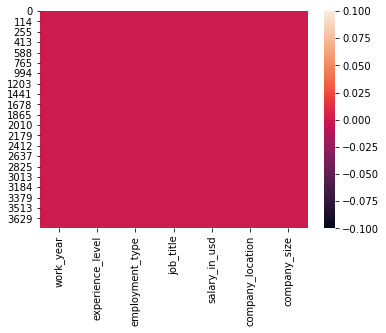

In [55]:
sns.heatmap(data.isnull())
plt.show()

## We are grouping the job_title and Salary 

In [59]:
job_title_salary = data.groupby(['job_title','experience_level'])['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
job_title_salary.head(10)

,job_title,experience_level,salary_in_usd
0,Data Engineer,EX,203260.0
1,Applied Scientist,SE,193688.0
2,ML Engineer,SE,192701.0
3,Machine Learning Scientist,EX,190000.0
4,Data Science Manager,EX,189280.0
5,Machine Learning Scientist,SE,188086.0
6,others,EX,188081.0
7,Data Science Manager,SE,185448.0
8,Data Scientist,EX,184719.0
9,Research Engineer,MI,178000.0


### 4) Data Visualization

#### 4.1) Histograms

Histograms are one of the most common graphs used to display numeric data.   
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

In [60]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,2023,SE,FT,others,85847,ES,L
1,2023,MI,CT,ML Engineer,30000,US,S
2,2023,MI,CT,ML Engineer,25500,US,S
3,2023,SE,FT,Data Scientist,175000,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,M


In [61]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
3735,2021,SE,FT,others,165000,US,L
3736,2021,MI,FT,others,151000,US,L
3737,2020,EN,FT,Data Scientist,105000,US,S
3738,2020,EN,CT,others,100000,US,L
3739,2021,SE,FT,Data Science Manager,94665,IN,L


In [62]:
data.reset_index(inplace=True)

In [63]:
data.tail()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
2365,3735,2021,SE,FT,others,165000,US,L
2366,3736,2021,MI,FT,others,151000,US,L
2367,3737,2020,EN,FT,Data Scientist,105000,US,S
2368,3738,2020,EN,CT,others,100000,US,L
2369,3739,2021,SE,FT,Data Science Manager,94665,IN,L


In [64]:
data.drop(columns=['index'],axis=1,inplace=True)

In [65]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
2365,2021,SE,FT,others,165000,US,L
2366,2021,MI,FT,others,151000,US,L
2367,2020,EN,FT,Data Scientist,105000,US,S
2368,2020,EN,CT,others,100000,US,L
2369,2021,SE,FT,Data Science Manager,94665,IN,L


In [66]:
data.shape

(2370, 7)

<AxesSubplot:xlabel='salary_in_usd'>

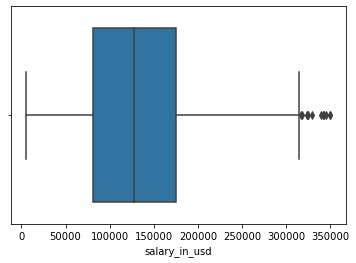

In [67]:
sns.boxplot(data.salary_in_usd)

In [70]:
data.tail()


,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
2365,2021,SE,FT,others,165000,US,L
2366,2021,MI,FT,others,151000,US,L
2367,2020,EN,FT,Data Scientist,105000,US,S
2368,2020,EN,CT,others,100000,US,L
2369,2021,SE,FT,Data Science Manager,94665,IN,L


In [71]:
data.job_title.value_counts()

Data Engineer                 529
Data Scientist                490
others                        355
Data Analyst                  352
Machine Learning Engineer     196
Analytics Engineer             85
Data Architect                 63
Research Scientist             61
Data Science Manager           52
ML Engineer                    34
Research Engineer              33
Applied Scientist              30
Machine Learning Scientist     26
Data Manager                   23
Data Science Consultant        23
Data Analytics Manager         18
Name: job_title, dtype: int64

<AxesSubplot:xlabel='count', ylabel='job_title'>

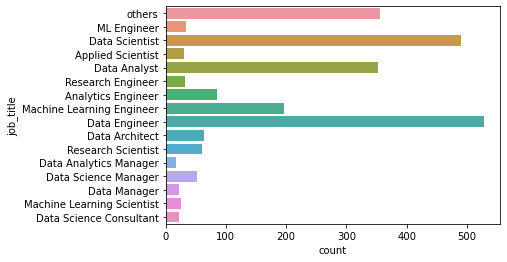

In [72]:
sns.countplot(y=data['job_title'])

In [73]:
data.experience_level.value_counts()

SE    1390
MI     621
EN     266
EX      93
Name: experience_level, dtype: int64

:- (SE) Senior-level employees   
:- (MI) Mid-level employees   
:- (EX) Executive-level employees    
:- (EN) Entry-level employees.   

<AxesSubplot:xlabel='experience_level', ylabel='count'>

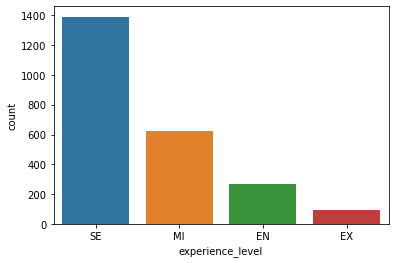

In [74]:
sns.countplot(data['experience_level'])

In [75]:
data.company_location.value_counts()

US        1726
GB         148
others     105
CA          82
IN          57
DE          55
ES          43
FR          33
BR          15
PT          14
NL          13
AU          13
GR          11
MX          10
IE           7
AT           6
SG           6
JP           6
NG           5
CH           5
PL           5
TR           5
Name: company_location, dtype: int64

<AxesSubplot:xlabel='count', ylabel='company_location'>

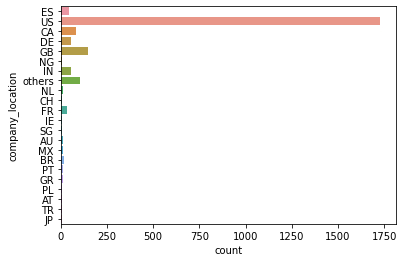

In [76]:
sns.countplot(y=data['company_location'])

In [77]:
data.experience_level.value_counts()

SE    1390
MI     621
EN     266
EX      93
Name: experience_level, dtype: int64

<AxesSubplot:xlabel='experience_level', ylabel='Count'>

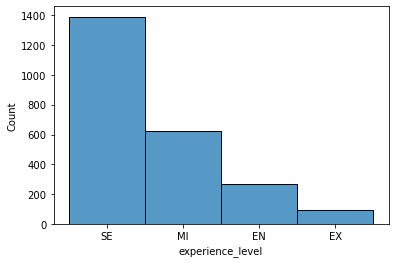

In [78]:
sns.histplot(data['experience_level'])

In [79]:
data.company_size.value_counts()

M    1827
L     398
S     145
Name: company_size, dtype: int64

<AxesSubplot:xlabel='company_size', ylabel='Count'>

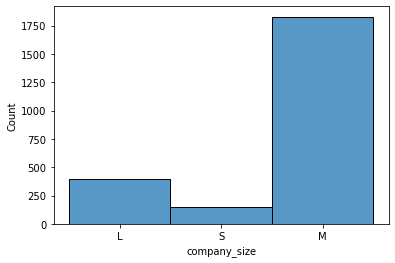

In [80]:
sns.histplot(data['company_size'])

<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

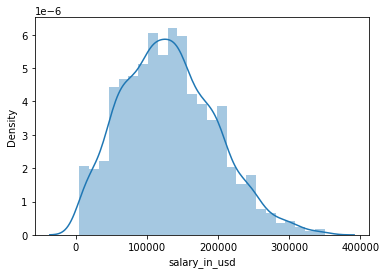

In [109]:
sns.distplot(data['salary_in_usd'])    # using to display only univariate analysis 
                                # Means sigle numerical variable

In [110]:
data.work_year.unique()

array([4, 3, 2, 1], dtype=int64)

In [111]:
data.replace(to_replace=[2023, 2022, 2020, 2021],value=[4,3,2,1],inplace=True)

In [112]:
data.work_year.unique()

array([4, 3, 2, 1], dtype=int64)

### Will use Log Transformation for charges to convert right skewed into normal distribution

<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

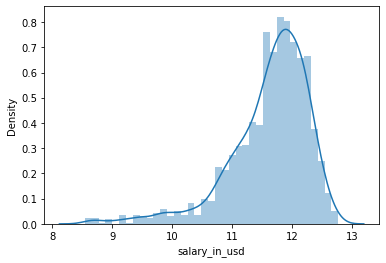

In [113]:
sns.distplot(np.log(data['salary_in_usd'])) 

In [114]:
new_df=data.copy()

In [115]:
new_df['salary_in_usd']=np.log(data['salary_in_usd'])

In [116]:
new_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,4,SE,FT,others,11.360322,ES,L
1,4,MI,CT,ML Engineer,10.308953,US,S
2,4,MI,CT,ML Engineer,10.146434,US,S
3,4,SE,FT,Data Scientist,12.072541,CA,M
4,4,SE,FT,Data Scientist,11.695247,CA,M


In [117]:
new_df.drop(columns=['job_title'],inplace=True,axis=1)

In [118]:
new_df.head()

,work_year,experience_level,employment_type,salary_in_usd,company_location,company_size
0,4,SE,FT,11.360322,ES,L
1,4,MI,CT,10.308953,US,S
2,4,MI,CT,10.146434,US,S
3,4,SE,FT,12.072541,CA,M
4,4,SE,FT,11.695247,CA,M


#### 4.3) Scatter plot
A Scatterplot is a type of graph which 'plots' the values along two axes, like age and height. Scatterplots are useful for many reasons. like correlation matrices, It allows you to quickly understand a relationship between two variables.

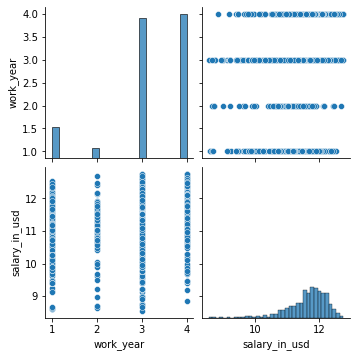

In [119]:
# pairplot matrix    (for multiple scatter plot we use pairplot)
sns.pairplot(new_df)

### Feature Engineering

#### Converting Categorical variable to Numerical Variable

#### Apply ''get_dummies()'' Method

This is one of the approach and also an each one to encode Categorical data. pandas get_dummies() method takes categorical feature as an argument. Then it creates a Dummy variable for every label in the feature, such that each dummy variable holds data as 1 or 0.1 indicates the presence of a particular label and 0 indicates the absence of a particular label.

For example, if a feature contains labels as Male and Female. After applying pandas get_dummies() to that feature, Dummy variable for both Male and Female labels are created. i.e., Dummy variables are created for every label in the feature. So that those Dummy variables holds 1 in the presence of that label and as 0 in the absence of that label.

In [120]:
 df3= pd.get_dummies(new_df,drop_first=True)  # get_dummies is a encoding Techniques

In [121]:
df3.shape

(2370, 31)

### 5) Split the dataframe into X & y

In [122]:
# Separate object for target feature 
y = df3['salary_in_usd']

# Separate object for Predictors 
X = df3.drop(columns=['salary_in_usd'],axis=1)

In [123]:
X.head()

,work_year,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_location_AU,company_location_BR,company_location_CA,company_location_CH,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_IE,company_location_IN,company_location_JP,company_location_MX,company_location_NG,company_location_NL,company_location_PL,company_location_PT,company_location_SG,company_location_TR,company_location_US,company_location_others,company_size_M,company_size_S
0,4,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,4,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [124]:
y.head()

0    11.360322
1    10.308953
2    10.146434
3    12.072541
4    11.695247
Name: salary_in_usd, dtype: float64

In [125]:
y.dtypes

dtype('float64')

In [126]:
print('X Shape =',X.shape,'\ny Shape =',y.shape)

X Shape = (2370, 30) 
y Shape = (2370,)


### 6) Train Test Split

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [128]:
X_train.shape,y_train.shape

((1896, 30), (1896,))

In [129]:
y_train.shape,y_test.shape

((1896,), (474,))

### 7) Build the Regression Algorithm

In [139]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

### Evaluation Metrics

In [140]:
X_train.head()

,work_year,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_location_AU,company_location_BR,company_location_CA,company_location_CH,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_IE,company_location_IN,company_location_JP,company_location_MX,company_location_NG,company_location_NL,company_location_PL,company_location_PT,company_location_SG,company_location_TR,company_location_US,company_location_others,company_size_M,company_size_S
6,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1049,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2028,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
581,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2077,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [141]:
X_train.work_year.unique()

array([4, 3, 2, 1], dtype=int64)

In [142]:
# Train Score
train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.5963596689710651


In [143]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)

R2 Score = 0.5138271430493122


In [144]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error = 0.34941407871940705
Mean Squared Error = 0.22492996729521658
Root Mean Squared Error = 0.47426782232744463


In [145]:
# To find the intercept 
print('Intercept =',np.exp(lr.intercept_))

Intercept = 35324.14470052351


In [146]:
# To find the co-efficients
print('coefficients =',np.exp(lr.coef_))

coefficients = [1.04650818 2.2300141  1.40367531 1.79704293 0.89773874 1.29576785
 0.65645261 1.10978462 0.42205371 1.34602267 0.7828814  1.23050218
 0.65940107 0.9149315  1.05320439 0.54187462 1.2997719  0.33001491
 1.67688144 0.95183538 1.01724714 1.05901186 0.67657581 0.59718619
 0.67527957 0.20913736 1.6645272  0.69223764 0.96808705 0.81899096]


In [147]:
pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(y_pred),'Variance':np.exp(y_test)-np.exp(y_pred)})

,Actual,Predicted,Variance
582,117000.0,158976.572355,-41976.572355
477,239748.0,158976.572355,80771.427645
215,239000.0,164217.229004,74782.770996
789,85000.0,84534.122518,465.877482
529,130000.0,128270.542023,1729.457977
1513,92250.0,151911.446949,-59661.446949
1193,95000.0,151911.446949,-56911.446949
1512,123000.0,151911.446949,-28911.446949
562,59020.0,49192.635276,9827.364724
962,94000.0,158976.572355,-64976.572355
